# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


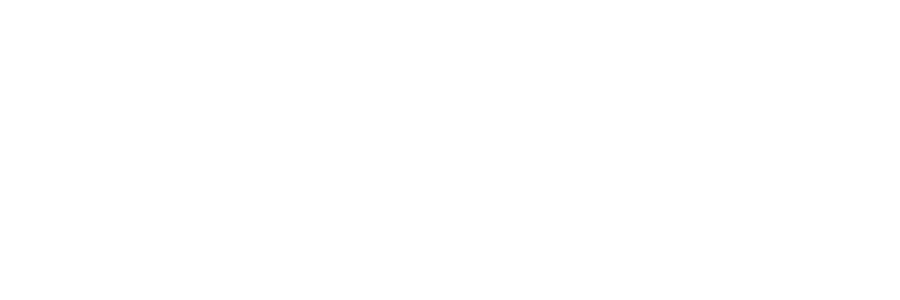

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


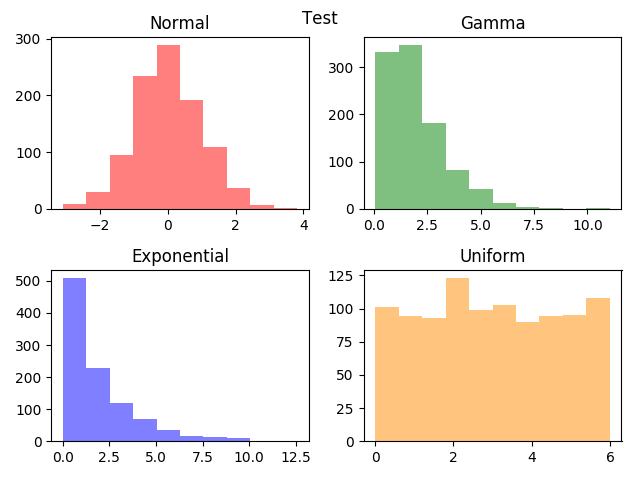

In [3]:
import matplotlib.animation as animation

fig, [(subplot1, subplot2), (subplot3, subplot4)] = plt.subplots(2,2)

In [4]:
plt.cla()
n=1000

In [5]:
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(2, 1, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(0, 6, n)

In [6]:
bins = 10

subplot1.hist(x1, bins=bins, alpha=0.5, color='red')
subplot2.hist(x2, bins=bins, alpha=0.5, color='green')
subplot3.hist(x3, bins=bins, alpha=0.5, color='blue')
subplot4.hist(x4, bins=bins, alpha=0.5, color='darkorange')


subplot1.set_title('Normal')
subplot2.set_title('Gamma')
subplot3.set_title('Exponential')
subplot4.set_title('Uniform')

fig.suptitle('Test')
plt.tight_layout()

In [7]:
x = [np.random.normal(0, 1, n),
     np.random.gamma(2, 1, n),
     np.random.exponential(2, n),
     np.random.uniform(0, 6, n)]

color = ['red', 'green', 'blue', 'darkorange']

title = ['Normal', 'Gamma', 'Exponential', 'Uniform']


In [8]:
def update(curr):
    bins = curr + 10
    
    for i in range(len(axes)):        
        if curr == n:
            a.event_score.stop()
    
        axes[i].cla()      
        axes[i].hist(x[i], bins=bins, alpha=0.5, color=color[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(title[i])   
        
    fig.suptitle('No of bins {}'.format(bins))
    plt.tight_layout()


<IPython.core.display.Javascript object>


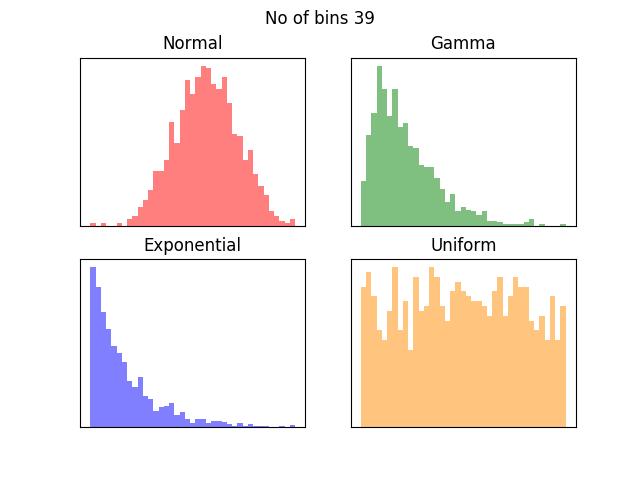

In [9]:
fig, [(subplot1, subplot2), (subplot3, subplot4)] = plt.subplots(2,2)

axes = [subplot1, subplot2, subplot3, subplot4]

a = animation.FuncAnimation(fig, 
                            update, 
                            interval=100,
                            save_count=500,
                            blit=True,
                            frames=100)

<IPython.core.display.Javascript object>


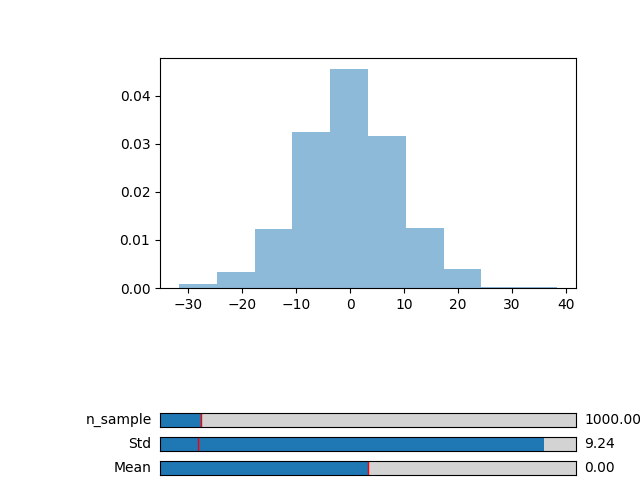

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib notebook


def update(val):
    mv = smean.val
    stdv = sstd.val
    n_sample = round(sn.val)
    nd = np.random.normal(loc=mv, scale=stdv, size=n_sample)
    #Redraw histogram
    ax.cla()
    ax.hist(nd, normed=True, bins=n_bins0, alpha=0.5)
    plt.draw()


def reset(event):
    mv.reset()
    stdv.reset()
    n_sample.reset()

    
plt.figure()
ax = plt.gca()
plt.subplots_adjust(left=0.25, bottom=0.25)

m = 0
std = 1
n = 1000
n_bins = 10

nd = np.random.normal(m, std, n)
plt.hist(nd, normed=True, bins=n_bins, alpha=0.5)

axcolor = 'lightgray'
axmean = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor =axcolor)
axstd = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor =axcolor)
axssize = plt.axes([0.25, 0.11, 0.65, 0.03], facecolor =axcolor)

smean = Slider(axmean, 'Mean', -5, 5, valinit=m0)
sstd = Slider(axstd, 'Std', 0.1, 10.0, valinit=std0)
sn = Slider(axssize, 'n_sample', 10, 10000, valinit=n0)

smean.on_changed(update)
sstd.on_changed(update)
sn.on_changed(update)

plt.show()